<a href="https://colab.research.google.com/github/LalithaEvani/Madhumeha/blob/main/cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CORONARY HEART DISEASE PREDICTION AFTER DIAGNOSIS OF DIABETES INFO RELATED TO RESEARCH PAPER**

Dataset used
From January 2017 till June 2019, 1,357 subjects with T2DM were recruited in the study. Patients with T2DM were recruited from the Inpatient Department of Endocrinology in Lu He hospital

https://www.nature.com/articles/s41598-020-71321-2

AI model to determine the risk of T2DM patients to develop to CHD(Coronary Heart Disease), which has potential value in providing early warning personalized guidance of CHD risk for both T2DM patients and clinicians.

CHD is a disease of the less blood supplying to heart muscle vessels11 manifested as hyperlipidaemia, myocardial infarction, and angina pectoris

It is known that individuals’ basic information like gender and age, and blood test indexes such as blood pressure, total cholesterol (TC), low-density lipoprotein cholesterol (LDL-C), high-density lipoprotein cholesterol (HDL-C) as well as smoking behaviour, diabetes status can be considered as risk factors of causing CHD

AI (random forest) based model to predict the risk of developing CHD for individuals with T2DM

the predictive model achieved an AUC of 0.77 (fivefold cross-validation) in the training dataset and an AUC of 0.80 in the testing dataset, respectively. Moreover, the model achieved an AUC of 0.71 on a totally independent dataset including 1,253 newly recruited T2DM patients.

table containing range parameters for data considered 

https://www.nature.com/articles/s41598-020-71321-2/tables/1 

we use the information entropy function and Gini impurity function to check the information hidden in each feature. One feature will get a higher score if this series of data contain more information for classification and vice versa. The information entropy function-based feature selection method is implemented by using random forest model with 500 decision trees in sci-kit-learn 0.2228 in Python 3.

Webserver based prediction 

https://www.cuilab.cn/dchd/#single

## **DATA GENERATION**

In [88]:
# importing libraries
import numpy as np
import pandas as pd
import math
import random


In [89]:
gender1= np.random.choice([0,1], size=7610, p=[0.482,0.518]) #0 for female 
gender2 = np.random.choice([0,1], size=2390, p=[0.470,0.530]) 
gender = np.concatenate((gender1,gender2))
gender

array([1, 0, 0, ..., 1, 1, 1])

In [90]:
smokers1= np.random.choice([1,0], size=7610, p=[0.381,0.619])
smokers2= np.random.choice([1,0], size=2390, p=[0.424,0.576])
smokers = np.concatenate((smokers1,smokers2))
print(smokers)


[0 0 1 ... 1 1 1]


In [91]:
drinking_alcohol1= np.random.choice([1,0], size=7610, p=[0.318,0.682])
drinking_alcohol2= np.random.choice([1,0], size=2390, p=[0.319,0.681])
drinking_alcohol = np.concatenate((drinking_alcohol1,drinking_alcohol2))
print(drinking_alcohol)

[0 0 0 ... 0 1 0]


In [92]:
age1 = np.random.uniform(39.77,68.37,7610)
age2 = np.random.uniform(55.16,74.66,2390)
age = np.concatenate((age1,age2))
np.around(age, decimals=2, out=age)
print(age)

[49.98 46.86 54.77 ... 64.62 67.23 61.1 ]


In [93]:
course_of_hypertension1 = np.random.uniform(4.92,5.98,7610)
course_of_hypertension2 = np.random.uniform(9.10,11.55,2390)
course_of_hypertension = np.concatenate((course_of_hypertension1, course_of_hypertension2))
np.around(course_of_hypertension, decimals=2, out=course_of_hypertension)
course_of_hypertension

array([ 5.44,  5.97,  5.25, ..., 11.06, 10.74, 10.55])

In [94]:
course_of_diabetes1 = np.random.uniform(6.80,7.73,7610)
course_of_diabetes2= np.random.uniform(10.38,12.36,2390)
course_of_diabetes = np.concatenate((course_of_diabetes1,course_of_diabetes2))
np.around(course_of_diabetes, decimals=2, out=course_of_diabetes)
course_of_diabetes

array([ 7.39,  7.68,  7.65, ..., 10.66, 11.48, 12.1 ])

In [95]:
systolic_pressure1 = np.random.uniform(110.26,147.74,7610)
systolic_pressure2= np.random.uniform(107.74,149.62,2390)
systolic_pressure = np.concatenate((systolic_pressure1,systolic_pressure2))
np.around(systolic_pressure, decimals=2, out=systolic_pressure)
systolic_pressure

array([131.41, 112.42, 125.86, ..., 126.22, 147.21, 141.14])

In [96]:
diastolic_pressure1 = np.random.uniform(65.5, 88.72,7610)
diastolic_pressure2 = np.random.uniform(60.1,85.5,2390)
diastolic_pressure = np.concatenate((diastolic_pressure1,diastolic_pressure2))
np.around(diastolic_pressure, decimals=2, out=diastolic_pressure)
diastolic_pressure

array([80.1 , 67.59, 87.63, ..., 78.54, 82.46, 64.55])

In [97]:
heartrate1 = np.random.uniform(70.45,96.39,7610)
heartrate2 = np.random.uniform(65.81,88.07,2390)
heartrate = np.concatenate((heartrate1,heartrate2))
np.around(heartrate, decimals=2, out=heartrate)
heartrate

array([89.09, 74.9 , 88.94, ..., 75.81, 69.27, 79.5 ])

In [98]:
body_mass_index1 = np.random.uniform(22.08,30.16,7610)
body_mass_index2 = np.random.uniform(22.66,30.01,2390)
body_mass_index = np.concatenate((body_mass_index1,body_mass_index2))
np.around(body_mass_index, decimals=2, out=body_mass_index)
body_mass_index

array([28.48, 28.78, 23.03, ..., 26.23, 22.86, 29.68])

In [99]:
waist_hip_rate1 = np.random.uniform(0.87,1.01,7610)
waist_hip_rate2 = np.random.uniform(0.88,1.02,2390)
waist_hip_rate = np.concatenate((waist_hip_rate1,waist_hip_rate2))
np.around(waist_hip_rate, decimals=2, out=waist_hip_rate)
waist_hip_rate

array([0.93, 0.96, 0.92, ..., 0.98, 0.92, 0.96])

In [100]:
blood_platelet1 = np.random.uniform(156.47,294.29,7610)
blood_platelet2 = np.random.uniform(112.42,287.86,2390)
blood_platelet = np.concatenate((blood_platelet1,blood_platelet2))
np.around(blood_platelet, decimals=2, out=blood_platelet)
blood_platelet

array([218.32, 234.95, 217.33, ..., 224.31, 152.92, 258.64])

In [101]:
hemoglobin1 = np.random.uniform(7.56,12.12,7610)
hemoglobin2 = np.random.uniform(7.18,11.58,2390)
hemoglobin = np.concatenate((hemoglobin1,hemoglobin2))
np.around(hemoglobin, decimals=2, out=hemoglobin)
hemoglobin

array([11.51,  7.58, 11.36, ..., 10.48,  7.22,  8.47])

In [102]:
serum_creatinine1 = np.random.uniform(39.59,94.91,7610)
serum_creatinine2 = np.random.uniform(44.24,108.18,2390)
serum_creatinine = np.concatenate((serum_creatinine1,serum_creatinine2))
np.around(serum_creatinine, decimals=2, out=serum_creatinine)
serum_creatinine

array([ 87.24,  44.05,  57.84, ...,  54.66, 100.51,  46.79])

In [103]:
uric_acid1 = np.random.uniform(312.95,326.53,7610)
uric_acid2 = np.random.uniform(321.41,346.41,2390)
uric_acid = np.concatenate((uric_acid1,uric_acid2))
np.around(uric_acid, decimals=2, out=uric_acid)
uric_acid

array([323.76, 321.55, 315.23, ..., 340.75, 331.14, 327.89])

In [104]:
serum_triglyceride1 = np.random.uniform(1.88,2.17,7610)
serum_triglyceride2 = np.random.uniform(1.58,1.95,2390)
serum_triglyceride = np.concatenate((serum_triglyceride1,serum_triglyceride2))
np.around(serum_triglyceride, decimals=2, out=serum_triglyceride)
serum_triglyceride

array([1.95, 1.97, 2.12, ..., 1.65, 1.67, 1.93])

In [105]:
total_cholesterol1 = np.random.uniform(3.5,5.92,7610)
total_cholesterol2 = np.random.uniform(2.96,5.3,2390)
total_cholesterol = np.concatenate((total_cholesterol1,total_cholesterol2))
np.around(total_cholesterol, decimals=2, out=total_cholesterol)
total_cholesterol

array([5.78, 4.62, 3.65, ..., 3.92, 3.29, 3.  ])

In [106]:
LDL_cholesterol1 = np.random.uniform(2.14,3.9,7610)
LDL_cholesterol2 = np.random.uniform(1.7,3.44,2390)
LDL_cholesterol = np.concatenate((LDL_cholesterol1,LDL_cholesterol2))
np.around(LDL_cholesterol, decimals=2, out=LDL_cholesterol)
LDL_cholesterol

array([3.53, 3.25, 3.17, ..., 3.34, 3.13, 1.88])

In [107]:
HDL_cholesterol1 = np.random.uniform(0.81,1.35,7610)
HDL_cholesterol2 = np.random.uniform(0.76,1.32,2390)
HDL_cholesterol = np.concatenate((HDL_cholesterol1,HDL_cholesterol2))
np.around(HDL_cholesterol, decimals=2, out=HDL_cholesterol)
HDL_cholesterol

array([0.89, 0.86, 0.84, ..., 1.01, 0.95, 0.91])

In [108]:
fasting_blood_glucose1 = np.random.uniform(8.78,9.38,7610)
fasting_blood_glucose2 = np.random.uniform(8.15,9.08,2390)
fasting_blood_glucose = np.concatenate((fasting_blood_glucose1,fasting_blood_glucose2))
np.around(fasting_blood_glucose, decimals=2, out=fasting_blood_glucose)
fasting_blood_glucose

array([8.83, 8.89, 9.18, ..., 8.67, 8.94, 8.76])

In [109]:
insulin0h1 = np.random.uniform(14.26,21.60,7610)
insulin0h2 = np.random.uniform(18.98,40.30,2390)
insulin0h = np.concatenate((insulin0h1,insulin0h2))
np.around(insulin0h, decimals=2, out=insulin0h)
insulin0h

array([19.39, 14.98, 15.62, ..., 39.1 , 32.1 , 24.86])

In [110]:
insulin1h1 = np.random.uniform(53.64,64.38,7610)
insulin1h2 = np.random.uniform(64.38,93.06,2390)
insulin1h = np.concatenate((insulin1h1,insulin1h2))
np.around(insulin1h, decimals=2, out=insulin1h)
insulin1h

array([63.42, 55.99, 60.72, ..., 72.82, 84.35, 85.68])

In [111]:
insulin2h1 = np.random.uniform(59.82,70.36,7610)
insulin2h2 = np.random.uniform(69.47,100.19,2390)
insulin2h = np.concatenate((insulin2h1,insulin2h2))
np.around(insulin2h, decimals=2, out=insulin2h)
insulin2h

array([66.24, 68.12, 64.95, ..., 94.68, 70.34, 99.64])

In [112]:
insulin3h1 = np.random.uniform(48.16,58.52,7610)
insulin3h2 = np.random.uniform(60.06,90.87,2390)
insulin3h = np.concatenate((insulin3h1,insulin3h2))
np.around(insulin3h, decimals=2, out=insulin3h)
insulin3h

array([56.98, 55.7 , 52.11, ..., 76.41, 64.13, 77.67])

In [113]:
cpeptide0h1 = np.random.uniform(1.51,1.64,7610)
cpeptide0h2 = np.random.uniform(1.68,1.95,2390)
cpeptide0h = np.concatenate((cpeptide0h1,cpeptide0h2))
np.around(cpeptide0h , decimals=2, out=cpeptide0h )
cpeptide0h 

array([1.54, 1.62, 1.55, ..., 1.85, 1.68, 1.82])

In [114]:
cpeptide1h1 = np.random.uniform(2.63,2.88,7610)
cpeptide1h2 = np.random.uniform(2.62,3.01,2390)
cpeptide1h = np.concatenate((cpeptide1h1,cpeptide1h2))
np.around(cpeptide1h , decimals=2, out=cpeptide1h )
cpeptide1h

array([2.87, 2.82, 2.76, ..., 2.67, 2.97, 2.66])

In [115]:
cpeptide2h1 = np.random.uniform(3.94,4.33,7610)
cpeptide2h2 = np.random.uniform(3.84,4.48,2390)
cpeptide2h = np.concatenate((cpeptide2h1,cpeptide2h2))
np.around(cpeptide2h , decimals=2, out=cpeptide2h )
cpeptide2h

array([4.16, 4.29, 4.26, ..., 4.3 , 3.94, 4.39])

In [116]:
cpeptide3h1 = np.random.uniform(4.05,4.44,7610)
cpeptide3h2 = np.random.uniform(4.14,4.86,2390)
cpeptide3h = np.concatenate((cpeptide3h1,cpeptide3h2))
np.around(cpeptide3h , decimals=2, out=cpeptide3h )
cpeptide3h

array([4.39, 4.18, 4.32, ..., 4.71, 4.36, 4.53])

In [117]:

label1 = np.array([0 for i in range(7610)])
label2 = np.array([1 for i in range(2390)])
label = np.concatenate((label1,label2))
label


array([0, 0, 0, ..., 1, 1, 1])

In [118]:
data = pd.DataFrame()

# defining the columns of the dataset
data['gender'] = gender
data['smokers'] = smokers
data['drinking alcohol'] = drinking_alcohol
data['age'] = age
data['course of hypertension'] = course_of_hypertension
data['course of diabetes'] = course_of_diabetes
data['systolic pressure'] = systolic_pressure
data['diastolic pressure'] = diastolic_pressure
data['heartrate'] = heartrate
data['body mass index'] = body_mass_index
data['waist hip rate'] = waist_hip_rate
data['blood platelet'] = blood_platelet
data['hemoglobin'] = hemoglobin
data['serum creatinine'] = serum_creatinine
data['uric acid'] = uric_acid
data['serum triglyceride'] = serum_triglyceride
data['total cholesterol'] = total_cholesterol
data['LDL cholesterol'] = LDL_cholesterol
data['HDL cholesterol'] = HDL_cholesterol
data['fasting blood glucose'] = fasting_blood_glucose
data['insulin 0 h'] = insulin0h
data['insulin 1 h'] = insulin1h
data['insulin 2 h'] = insulin2h
data['insulin 3 h'] = insulin3h
data['c-peptide 0 h'] = cpeptide0h
data['c-peptide 1 h'] = cpeptide1h
data['c-peptide 2 h'] = cpeptide2h
data['c-peptide 3 h'] = cpeptide3h
data['label'] = label

data

,gender,smokers,drinking alcohol,age,course of hypertension,course of diabetes,systolic pressure,diastolic pressure,heartrate,body mass index,...,fasting blood glucose,insulin 0 h,insulin 1 h,insulin 2 h,insulin 3 h,c-peptide 0 h,c-peptide 1 h,c-peptide 2 h,c-peptide 3 h,label
0,1,0,0,49.98,5.44,7.39,131.41,80.10,89.09,28.48,...,8.83,19.39,63.42,66.24,56.98,1.54,2.87,4.16,4.39,0
1,0,0,0,46.86,5.97,7.68,112.42,67.59,74.90,28.78,...,8.89,14.98,55.99,68.12,55.70,1.62,2.82,4.29,4.18,0
2,0,1,0,54.77,5.25,7.65,125.86,87.63,88.94,23.03,...,9.18,15.62,60.72,64.95,52.11,1.55,2.76,4.26,4.32,0
3,0,0,0,50.25,5.01,7.36,136.50,87.67,87.16,26.98,...,9.32,20.27,56.70,60.24,53.80,1.60,2.79,4.04,4.20,0
4,1,0,1,57.81,5.68,7.10,120.77,77.57,78.48,28.92,...,9.23,20.19,53.66,66.94,53.85,1.58,2.66,3.97,4.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,72.41,9.22,10.96,110.44,80.60,86.71,29.38,...,8.21,31.18,90.12,74.91,71.45,1.84,2.99,4.01,4.50,1
9996,0,0,0,68.95,9.57,11.36,126.79,66.54,87.16,27.18,...,8.77,35.26,90.96,86.99,83.47,1.77,2.81,4.24,4.82,1
9997,1,1,0,64.62,11.06,10.66,126.22,78.54,75.81,26.23,...,8.67,39.10,72.82,94.68,76.41,1.85,2.67,4.30,4.71,1
9998,1,1,1,67.23,10.74,11.48,147.21,82.46,69.27,22.86,...,8.94,32.10,84.35,70.34,64.13,1.68,2.97,3.94,4.36,1


In [119]:
cardio_data = data.sample(frac=1)
cardio_data.reset_index(inplace= True, drop = True)
cardio_data

,gender,smokers,drinking alcohol,age,course of hypertension,course of diabetes,systolic pressure,diastolic pressure,heartrate,body mass index,...,fasting blood glucose,insulin 0 h,insulin 1 h,insulin 2 h,insulin 3 h,c-peptide 0 h,c-peptide 1 h,c-peptide 2 h,c-peptide 3 h,label
0,1,0,0,60.29,5.04,6.90,144.36,88.36,83.44,22.24,...,8.80,17.56,58.42,63.19,48.96,1.55,2.64,3.99,4.43,0
1,1,0,0,64.93,9.80,11.12,137.96,70.64,87.75,27.57,...,8.67,38.80,79.21,94.08,66.41,1.87,2.76,4.40,4.78,1
2,1,0,0,59.68,4.95,7.70,118.87,88.22,81.34,26.46,...,9.00,14.99,54.76,61.29,56.06,1.63,2.87,4.01,4.37,0
3,1,1,0,61.98,5.79,7.66,117.30,75.81,91.26,22.83,...,9.31,20.75,59.08,69.91,50.71,1.58,2.85,4.10,4.05,0
4,0,0,0,39.80,4.98,6.83,146.61,88.11,91.44,25.58,...,9.28,17.61,64.22,64.78,52.97,1.55,2.81,4.04,4.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,53.15,5.09,7.07,127.79,69.62,74.37,27.55,...,9.15,18.31,56.03,62.37,51.17,1.60,2.79,4.06,4.23,0
9996,1,1,1,42.00,5.66,7.37,141.74,86.10,81.62,27.48,...,8.96,14.64,58.18,64.54,52.41,1.61,2.86,4.19,4.07,0
9997,1,0,0,69.94,9.40,11.78,133.41,71.02,82.29,28.15,...,8.41,22.23,65.42,76.13,60.30,1.82,2.93,3.96,4.17,1
9998,0,0,0,62.98,9.99,11.81,143.05,78.58,80.09,24.73,...,8.46,33.21,69.47,74.25,61.74,1.82,2.79,4.39,4.21,1


In [120]:
cardio_data.to_csv('cardiovascular.csv')

## **IMPORT DATA**

In [121]:
import pandas as pd
cardio = pd.read_csv('/content/cardiovascular.csv')

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
cardio_validate = pd.read_csv('/content/drive/MyDrive/cardiovascular.csv')

In [124]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   gender                  10000 non-null  int64  
 2   smokers                 10000 non-null  int64  
 3   drinking alcohol        10000 non-null  int64  
 4   age                     10000 non-null  float64
 5   course of hypertension  10000 non-null  float64
 6   course of diabetes      10000 non-null  float64
 7   systolic pressure       10000 non-null  float64
 8   diastolic pressure      10000 non-null  float64
 9   heartrate               10000 non-null  float64
 10  body mass index         10000 non-null  float64
 11  waist hip rate          10000 non-null  float64
 12  blood platelet          10000 non-null  float64
 13  hemoglobin              10000 non-null  float64
 14  serum creatinine        10000 non-null 

In [125]:
cardio.describe()

,Unnamed: 0,gender,smokers,drinking alcohol,age,course of hypertension,course of diabetes,systolic pressure,diastolic pressure,heartrate,...,fasting blood glucose,insulin 0 h,insulin 1 h,insulin 2 h,insulin 3 h,c-peptide 0 h,c-peptide 1 h,c-peptide 2 h,c-peptide 3 h,label
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.518600,0.393300,0.313600,56.568950,6.614350,8.248389,128.919554,76.029842,81.787269,...,8.969117,20.722375,63.741280,69.782444,58.568663,1.632576,2.769138,4.140327,4.304701,0.239000
std,2886.89568,0.499679,0.488507,0.463979,8.936686,2.123019,1.791591,11.058129,7.200427,7.829702,...,0.280609,6.097571,9.719228,9.824384,10.628489,0.114419,0.087152,0.133362,0.178154,0.426494
min,0.00000,0.000000,0.000000,0.000000,39.770000,4.920000,6.800000,107.760000,60.130000,65.840000,...,8.150000,14.260000,53.640000,59.820000,48.160000,1.510000,2.620000,3.840000,4.050000,0.000000
25%,2499.75000,0.000000,0.000000,0.000000,49.197500,5.270000,7.100000,119.437500,70.070000,75.267500,...,8.840000,16.680000,57.180000,63.180000,51.490000,1.550000,2.700000,4.030000,4.170000,0.000000
50%,4999.50000,1.000000,0.000000,0.000000,57.400000,5.620000,7.410000,128.945000,75.960000,81.455000,...,9.000000,19.080000,60.700000,66.740000,54.950000,1.600000,2.760000,4.140000,4.280000,0.000000
75%,7499.25000,1.000000,1.000000,1.000000,63.702500,5.960000,7.720000,138.452500,82.130000,87.982500,...,9.180000,21.250000,64.240000,70.140000,58.340000,1.640000,2.830000,4.240000,4.390000,0.000000
max,9999.00000,1.000000,1.000000,1.000000,74.650000,11.550000,12.360000,149.610000,88.720000,96.390000,...,9.380000,40.290000,93.060000,100.180000,90.860000,1.950000,3.010000,4.480000,4.860000,1.000000


# NULL VALUES


In [126]:
cardio.isnull().sum()

Unnamed: 0                0
gender                    0
smokers                   0
drinking alcohol          0
age                       0
course of hypertension    0
course of diabetes        0
systolic pressure         0
diastolic pressure        0
heartrate                 0
body mass index           0
waist hip rate            0
blood platelet            0
hemoglobin                0
serum creatinine          0
uric acid                 0
serum triglyceride        0
total cholesterol         0
LDL cholesterol           0
HDL cholesterol           0
fasting blood glucose     0
insulin 0 h               0
insulin 1 h               0
insulin 2 h               0
insulin 3 h               0
c-peptide 0 h             0
c-peptide 1 h             0
c-peptide 2 h             0
c-peptide 3 h             0
label                     0
dtype: int64

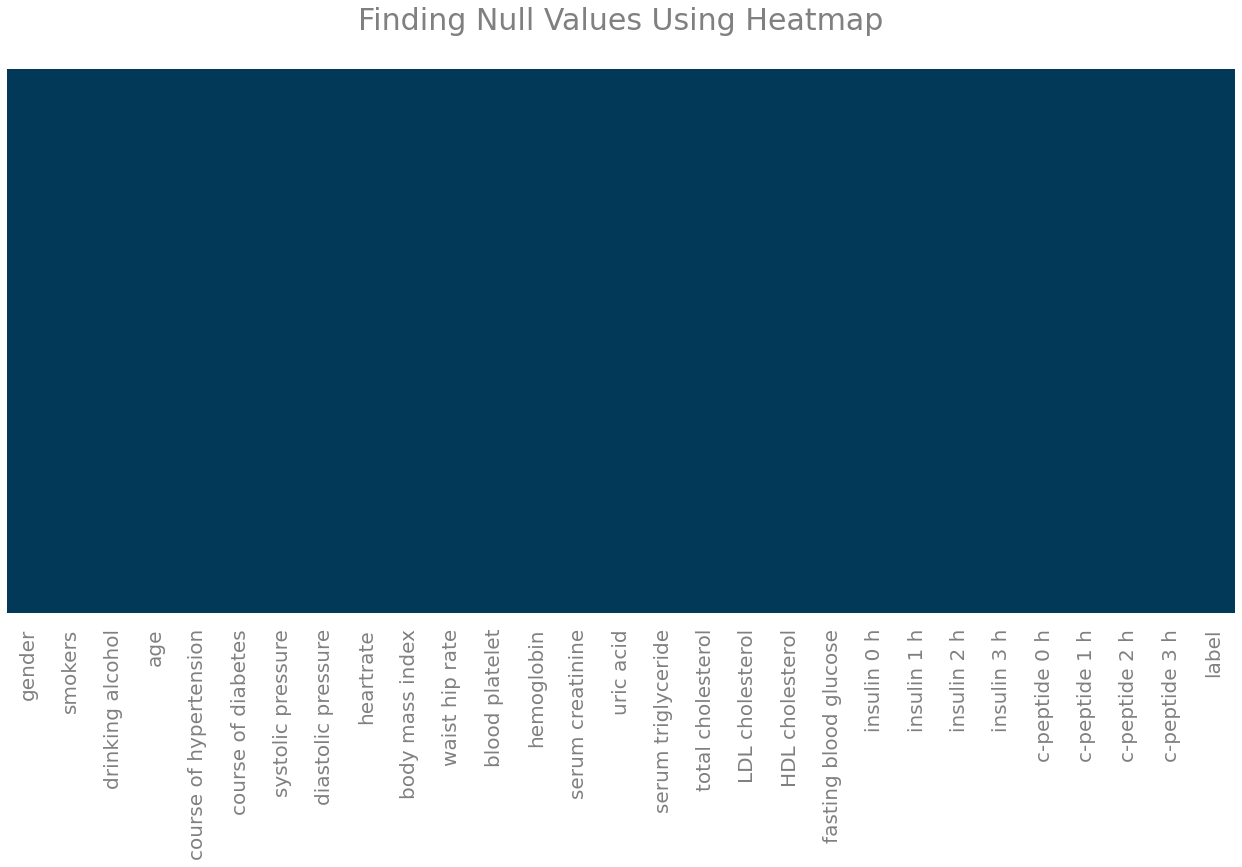

In [127]:
# visualizing null values if it exists
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [128]:
#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = cardio.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                     Specs        Score
5   course of hypertension  6521.007359
12          blood platelet  5217.994010
6       course of diabetes  3731.901601
4                      age  3580.846206
0               Unnamed: 0  2430.473062
9                heartrate   997.190255
8       diastolic pressure   457.742228
2                  smokers    14.264220
10         body mass index     4.569909
7        systolic pressure     0.844552
11          waist hip rate     0.274051
1                   gender     0.224322


[1.90482444e-04 9.17431355e-05 3.79093286e-04 9.58761526e-05
 5.28487752e-02 4.48259463e-01 4.48439931e-01 1.48283876e-03
 1.44587329e-02 1.83860601e-02 8.37025842e-04 3.10390139e-03
 1.14260769e-02]


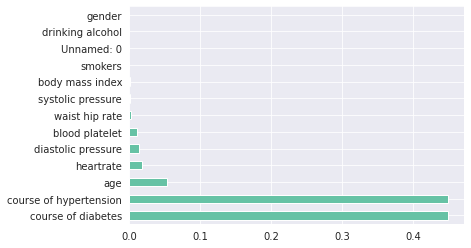

In [129]:
#feature importance 
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

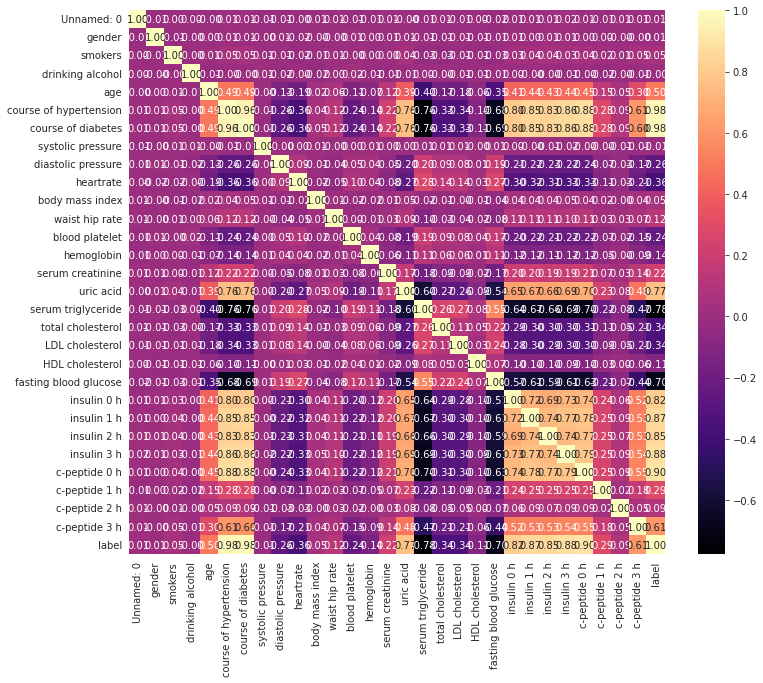

In [130]:
#CORRELATION MATRIX WITH HEAT MAP

plt.figure(figsize=(12,10))
sns.heatmap(cardio.corr(),annot=True,cmap="magma",fmt='.2f')

In [131]:
#NO OF UNIQUE VALUES FOR EACH COLUMN
for i in cardio.columns:
    print(i,len(cardio[i].unique()))

Unnamed: 0 10000
gender 2
smokers 2
drinking alcohol 2
age 3160
course of hypertension 353
course of diabetes 293
systolic pressure 3640
diastolic pressure 2625
heartrate 2823
body mass index 809
waist hip rate 16
blood platelet 7399
hemoglobin 495
serum creatinine 4902
uric acid 2563
serum triglyceride 60
total cholesterol 297
LDL cholesterol 221
HDL cholesterol 60
fasting blood glucose 124
insulin 0 h 1993
insulin 1 h 2675
insulin 2 h 2680
insulin 3 h 2677
c-peptide 0 h 42
c-peptide 1 h 40
c-peptide 2 h 65
c-peptide 3 h 82
label 2


# DATA VISUALIZATION

In [132]:

sns.set_style('darkgrid')
sns.set_palette('Set2')

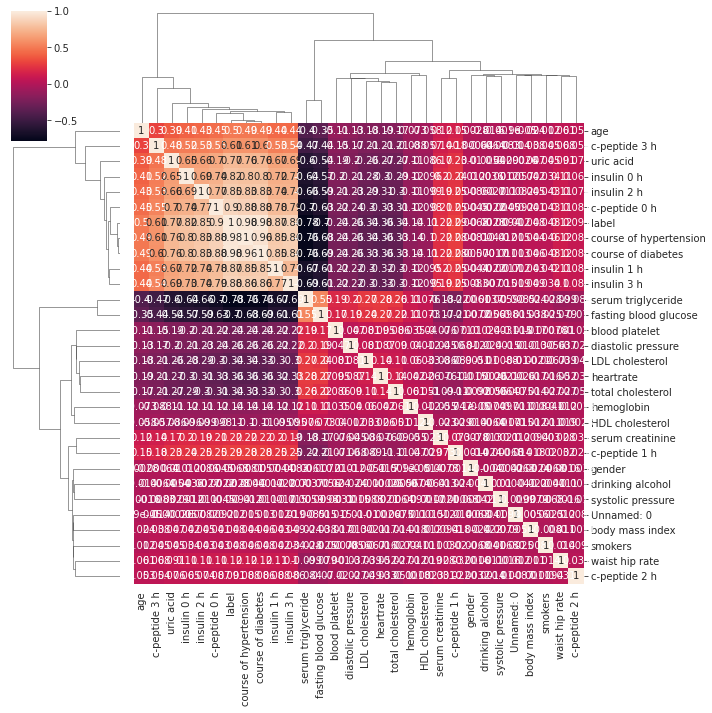

In [133]:
#CLUSTER MAP 
sns.clustermap(cardio.corr(),annot=True)


In [134]:
import matplotlib.pyplot as plt

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cardio_data = pd.DataFrame(cardio ,columns=cardio.columns[:-1])
cardio_label = cardio.label
X_train, X_test, y_train, y_test = train_test_split(cardio_data, cardio_label, test_size = 0.30, random_state = 17) 

#clf = RandomForestClassifier(max_depth=3, random_state=0)
#clf.fit(X_train, y_train)

#Training Error in terms of points:
from sklearn.metrics import accuracy_score
#print("{:.2f} % of the testing points classified correctly".format(100*accuracy_score(clf.predict(X_test), y_test)))

#cardio_validate_data = pd.DataFrame(cardio_validate,columns = cardio_validate.columns[:-1])
#cardio_validate_label = cardio_validate.label
#print("accuracy of validation",100*accuracy_score(clf.predict(cardio_validate_data),cardio_validate_label))


# **KNN**

In [136]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
scores_list = []
  
for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

# determining the best k
Accuracy = [x*100 for x in scores_list]
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print("Obtained maximum accuracy of ",max_acc,"for k: ", optimal_ks)

Obtained maximum accuracy of  96.13333333333334 for k:  [1]


# DECISION TREES


In [165]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   gender                  10000 non-null  int64  
 2   smokers                 10000 non-null  int64  
 3   drinking alcohol        10000 non-null  int64  
 4   age                     10000 non-null  float64
 5   course of hypertension  10000 non-null  float64
 6   course of diabetes      10000 non-null  float64
 7   systolic pressure       10000 non-null  float64
 8   diastolic pressure      10000 non-null  float64
 9   heartrate               10000 non-null  float64
 10  body mass index         10000 non-null  float64
 11  waist hip rate          10000 non-null  float64
 12  blood platelet          10000 non-null  float64
 13  hemoglobin              10000 non-null  float64
 14  serum creatinine        10000 non-null 

In [166]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = cardio.iloc[:,1:29] # Features
y = cardio.iloc[:,29] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [167]:
y_train

2228    0
5910    0
1950    0
2119    0
5947    0
       ..
2895    0
7813    0
905     0
5192    0
235     0
Name: label, Length: 7000, dtype: int64

In [168]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [169]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [170]:
feature_cols = X.columns.tolist()
feature_cols 

['gender',
 'smokers',
 'drinking alcohol',
 'age',
 'course of hypertension',
 'course of diabetes',
 'systolic pressure',
 'diastolic pressure',
 'heartrate',
 'body mass index',
 'waist hip rate',
 'blood platelet',
 'hemoglobin',
 'serum creatinine',
 'uric acid',
 'serum triglyceride',
 'total cholesterol',
 'LDL cholesterol',
 'HDL cholesterol',
 'fasting blood glucose',
 'insulin 0 h',
 'insulin 1 h',
 'insulin 2 h',
 'insulin 3 h',
 'c-peptide 0 h',
 'c-peptide 1 h',
 'c-peptide 2 h',
 'c-peptide 3 h']

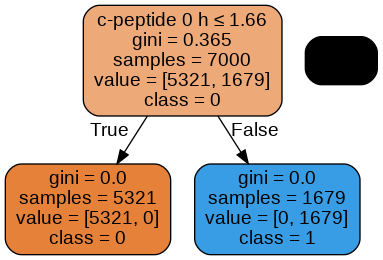

In [171]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols  ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [172]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


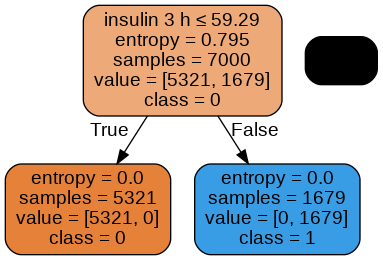

In [173]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# **svm**

In [137]:
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7507


In [138]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2252    0]
 [ 748    0]]

True Positives(TP) =  2252

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  748


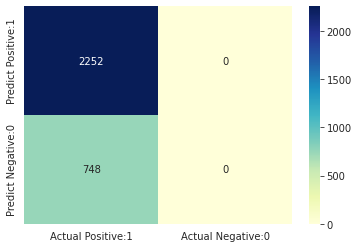

In [139]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2252
           1       0.00      0.00      0.00       748

    accuracy                           0.75      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.56      0.75      0.64      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [142]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7507


In [143]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2493


In [144]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [145]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7507


In [146]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9987


In [147]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9993


In [148]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 1.0000


In [149]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 1.0000


In [150]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 1.0000


In [151]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7507


In [152]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9163


In [153]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.6383


In [154]:
from datetime import datetime as dt
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)




start = dt.now()
# process stuff
running_secs = (dt.now() - start)
print("training time: " , running_secs)

# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)
start = dt.now()
# process stuff
running_secs = (dt.now() - start)
print("testing time: " , running_secs)



# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

training time:  0:00:00.000045
testing time:  0:00:00.000043
Model accuracy score with sigmoid kernel and C=100.0 : 0.6380


# LOGISTIC REGRESSION


In [176]:
X = cardio.drop('label', axis = 1)
X

,Unnamed: 0,gender,smokers,drinking alcohol,age,course of hypertension,course of diabetes,systolic pressure,diastolic pressure,heartrate,...,HDL cholesterol,fasting blood glucose,insulin 0 h,insulin 1 h,insulin 2 h,insulin 3 h,c-peptide 0 h,c-peptide 1 h,c-peptide 2 h,c-peptide 3 h
0,0,1,0,0,60.29,5.04,6.90,144.36,88.36,83.44,...,1.32,8.80,17.56,58.42,63.19,48.96,1.55,2.64,3.99,4.43
1,1,1,0,0,64.93,9.80,11.12,137.96,70.64,87.75,...,1.18,8.67,38.80,79.21,94.08,66.41,1.87,2.76,4.40,4.78
2,2,1,0,0,59.68,4.95,7.70,118.87,88.22,81.34,...,0.99,9.00,14.99,54.76,61.29,56.06,1.63,2.87,4.01,4.37
3,3,1,1,0,61.98,5.79,7.66,117.30,75.81,91.26,...,0.89,9.31,20.75,59.08,69.91,50.71,1.58,2.85,4.10,4.05
4,4,0,0,0,39.80,4.98,6.83,146.61,88.11,91.44,...,1.27,9.28,17.61,64.22,64.78,52.97,1.55,2.81,4.04,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1,1,0,53.15,5.09,7.07,127.79,69.62,74.37,...,1.24,9.15,18.31,56.03,62.37,51.17,1.60,2.79,4.06,4.23
9996,9996,1,1,1,42.00,5.66,7.37,141.74,86.10,81.62,...,1.10,8.96,14.64,58.18,64.54,52.41,1.61,2.86,4.19,4.07
9997,9997,1,0,0,69.94,9.40,11.78,133.41,71.02,82.29,...,0.83,8.41,22.23,65.42,76.13,60.30,1.82,2.93,3.96,4.17
9998,9998,0,0,0,62.98,9.99,11.81,143.05,78.58,80.09,...,1.28,8.46,33.21,69.47,74.25,61.74,1.82,2.79,4.39,4.21


In [177]:
y = cardio['label']
y

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: label, Length: 10000, dtype: int64

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [180]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [ ]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

In [182]:
y_pred = logre.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1517
           1       1.00      1.00      1.00       483

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



[[1517    0]
 [   0  483]]


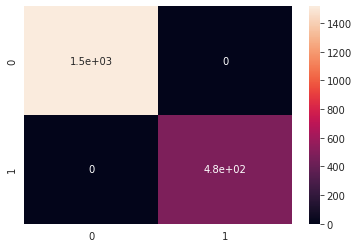

In [185]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

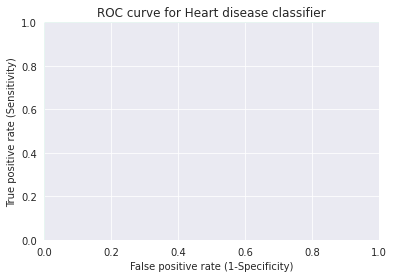

In [188]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [187]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

1.0

# **NAIVE BAYES**

In [189]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy on testing data : ".format(100*accuracy_score(y_pred,y_test)))


Accuracy on testing data : 
